# 1D Random Walk

## Import libraries

In [77]:
import numpy as np #handles arrays 
import matplotlib.pyplot as plt #for plotting (basic)
import seaborn as sns #also for plotting 
from IPython.display import display, Latex #for formatting print

In [6]:
# Random generator of numpy 
rng = np.random.default_rng()

## Simulation of a single simple random walker in 1D

### Start with 1 value of number of steps

In [12]:
#define the parameters of the problem
n_steps=100 #number of steps 
n_walkers=1 #number of walkers
S_0=5

#### Method 1: 
Loop over # of steps (100 in this case) and in each iteration generate a step to the left (-1) or a step to the right (+1)

#### Method 2: 
Generate all 100 steps (in this case) at once: 

rng.integers(low, high=None, size=None) allows us to generate 'size' amount of integers from [low, high). 

If we do low=-1, and high=1 we will also generate 0s. 

To overcome this we will generate 1s and 2s and then convert them to -1 and +1

In [9]:
#Step 1: generate random integers 1 or 2
# The number of integers we need to generate is n_steps*n_walkers 
# by specifying size=(n_simu,n_step) we ask to generate integers in form of a matrix, where each row is a walker and each column is a step
simu= rng.integers(1,3, (n_walkers,n_steps)) 

#Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

#### Find S_n

In [15]:
S_n = S_0+np.cumsum(steps,1) 
# S_n is a matrix where each row is a walker, and the columns represent the location.
# For example: row 0 and column 322 is the first walker and its location after 323 steps. 

# Notice! No boundary or geometrical properties of the problem were implemented yet. 

#### What is np.cumsum? 
np.cumsum(steps,1)  cumulatively sums over the steps. For example, if steps=[-1,1,1,1] then np.cumsum(steps) = [-1,  0,  1,  2]

Since: np.cumsum(steps) = [-1 = -1,  -1+1=0,  -1+1+1= 1, -1+1+1 = 2]

<br>

The '1' after the comma specific if we perform the cumsum over the columns or the rows. For 0 we cumulatively sum over values in all the rows (for each separate column) and for 1 we cumulatively sum over values in all the columns (for each separate row).

Let us take an example: 
Do we sum over all the values in the first row (which is the first walker), i.e. over all the columns (or steps) of the first row (walker), and repeat the process for each row (walker)? 

OR 

Do we sum over all the values in the first column (which is the first step), i.e. over all the rows (or walkers) of the first column (step), and repeat the process for each column (step)?

#### Example

In [20]:
#to understand cumsum better we will look at an example 
example_array=np.array([[-1,1,1,1], [1,1,1,-1], [-1,1,1,-1]])
example_array

array([[-1,  1,  1,  1],
       [ 1,  1,  1, -1],
       [-1,  1,  1, -1]])

In [26]:
np.cumsum(example_array, axis=0) # sum over all the rows, for each separate column

array([[-1,  1,  1,  1],
       [ 0,  2,  2,  0],
       [-1,  3,  3, -1]])

In [27]:
np.cumsum(example_array, axis=1) # sum over all the columns, for each separate row

array([[-1,  0,  1,  2],
       [ 1,  2,  3,  2],
       [-1,  0,  1,  0]])

## Plot trajectory

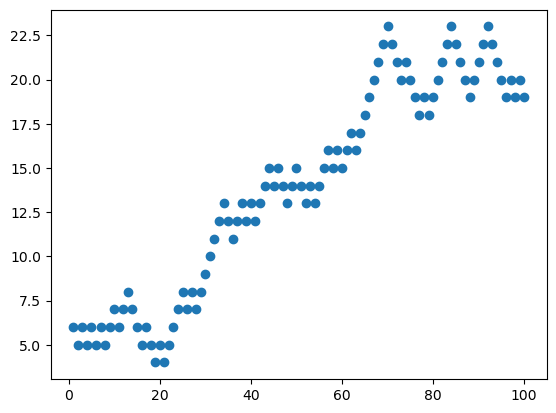

In [30]:
x_array=np.arange(1,n_steps+1) #our x-axis is the steps (first step, second step, etc) 
plt.scatter(x_array,S_n) #plot to get a feeling of what we should get

Text(0, 0.5, 'Location of Walker ($S_n$)')

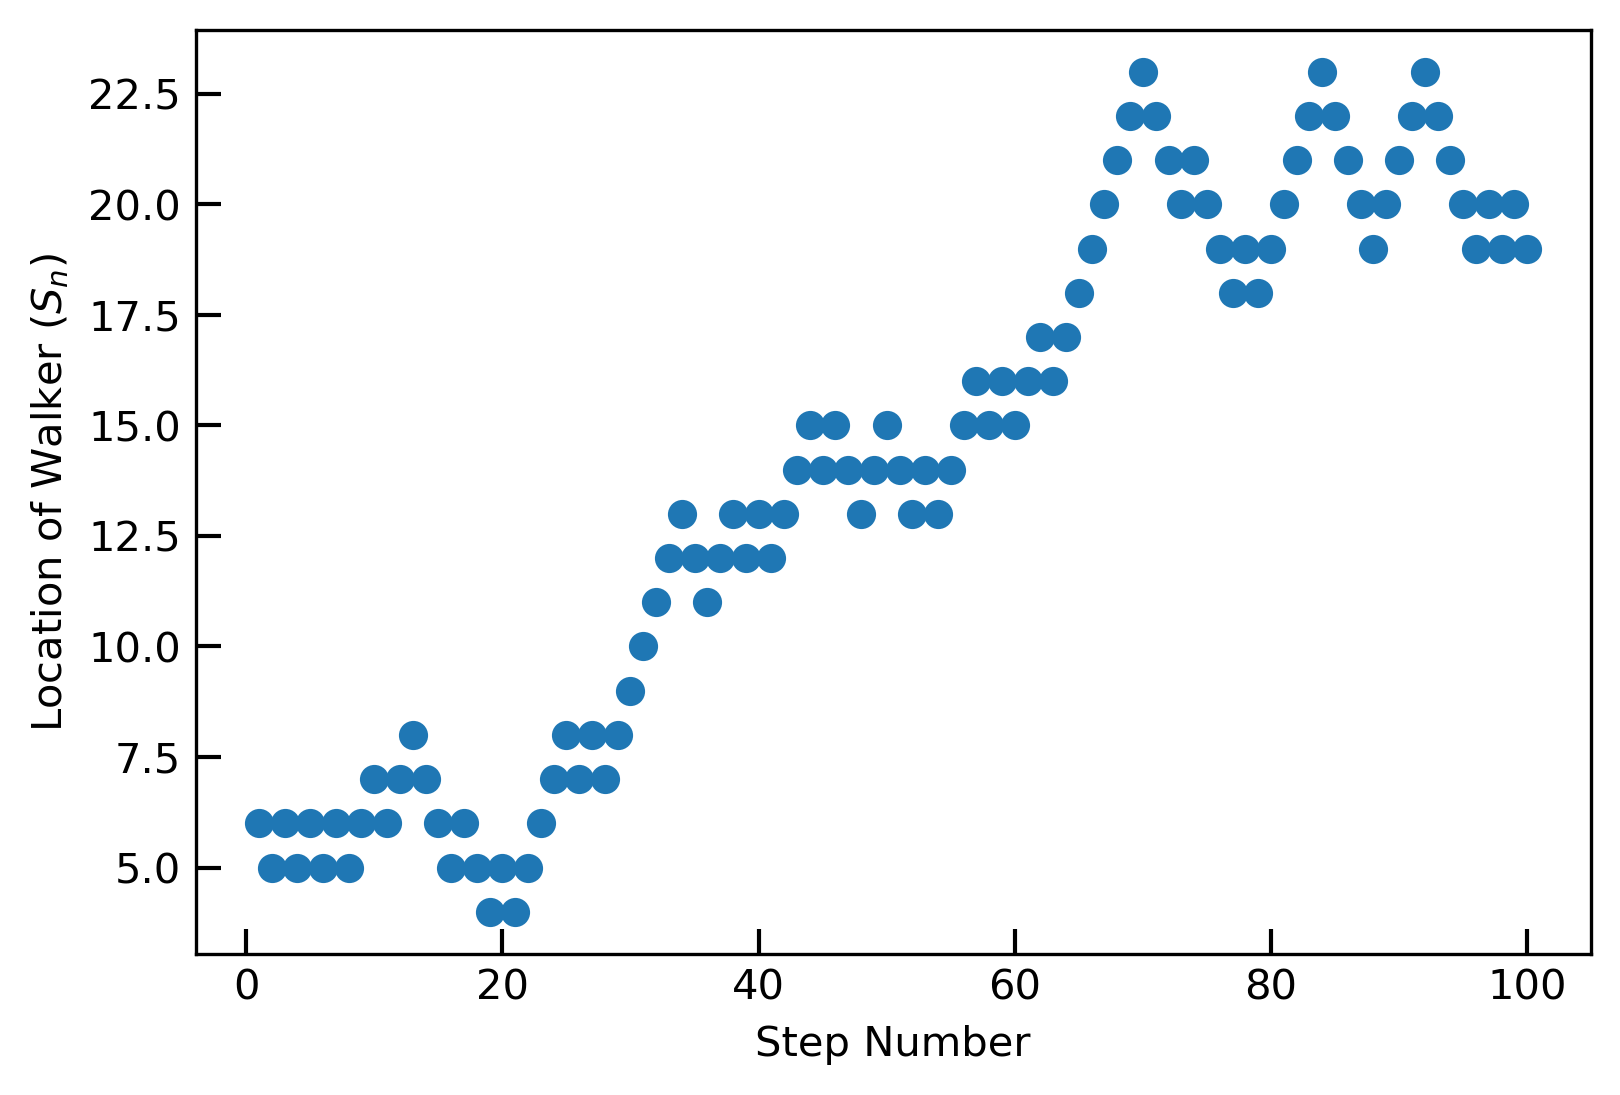

In [32]:
#format your plot 
row_num, col_num=1,1
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)


ax.scatter(x_array,S_n)
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1)
ax.set_xlabel('Step Number')
ax.set_ylabel(r'Location of Walker ($S_n$)')

### Repeat above for all # of steps

In [34]:
#define the parameters of the problem
n_steps=[100, 1000, 10000, 100000] #number of steps 
n_walkers=1 #number of walkers
S_0=5

In [35]:
#create a variable to save the S_n of a single walker for each # of steps 
S_ns={} #I will choose a dictionary, but you can choose a numpy array, or a list, whatever is convenient for you
for n_step in n_steps:
    #Step 1: generate random integers 1 or 2
    simu= rng.integers(1,3, (n_walkers,n_step)) #notice n_steps changed to n_step
    
    #Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
    steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

    #find S_n
    S_n = S_0+np.cumsum(steps,1) 
    S_ns[n_step]=S_n

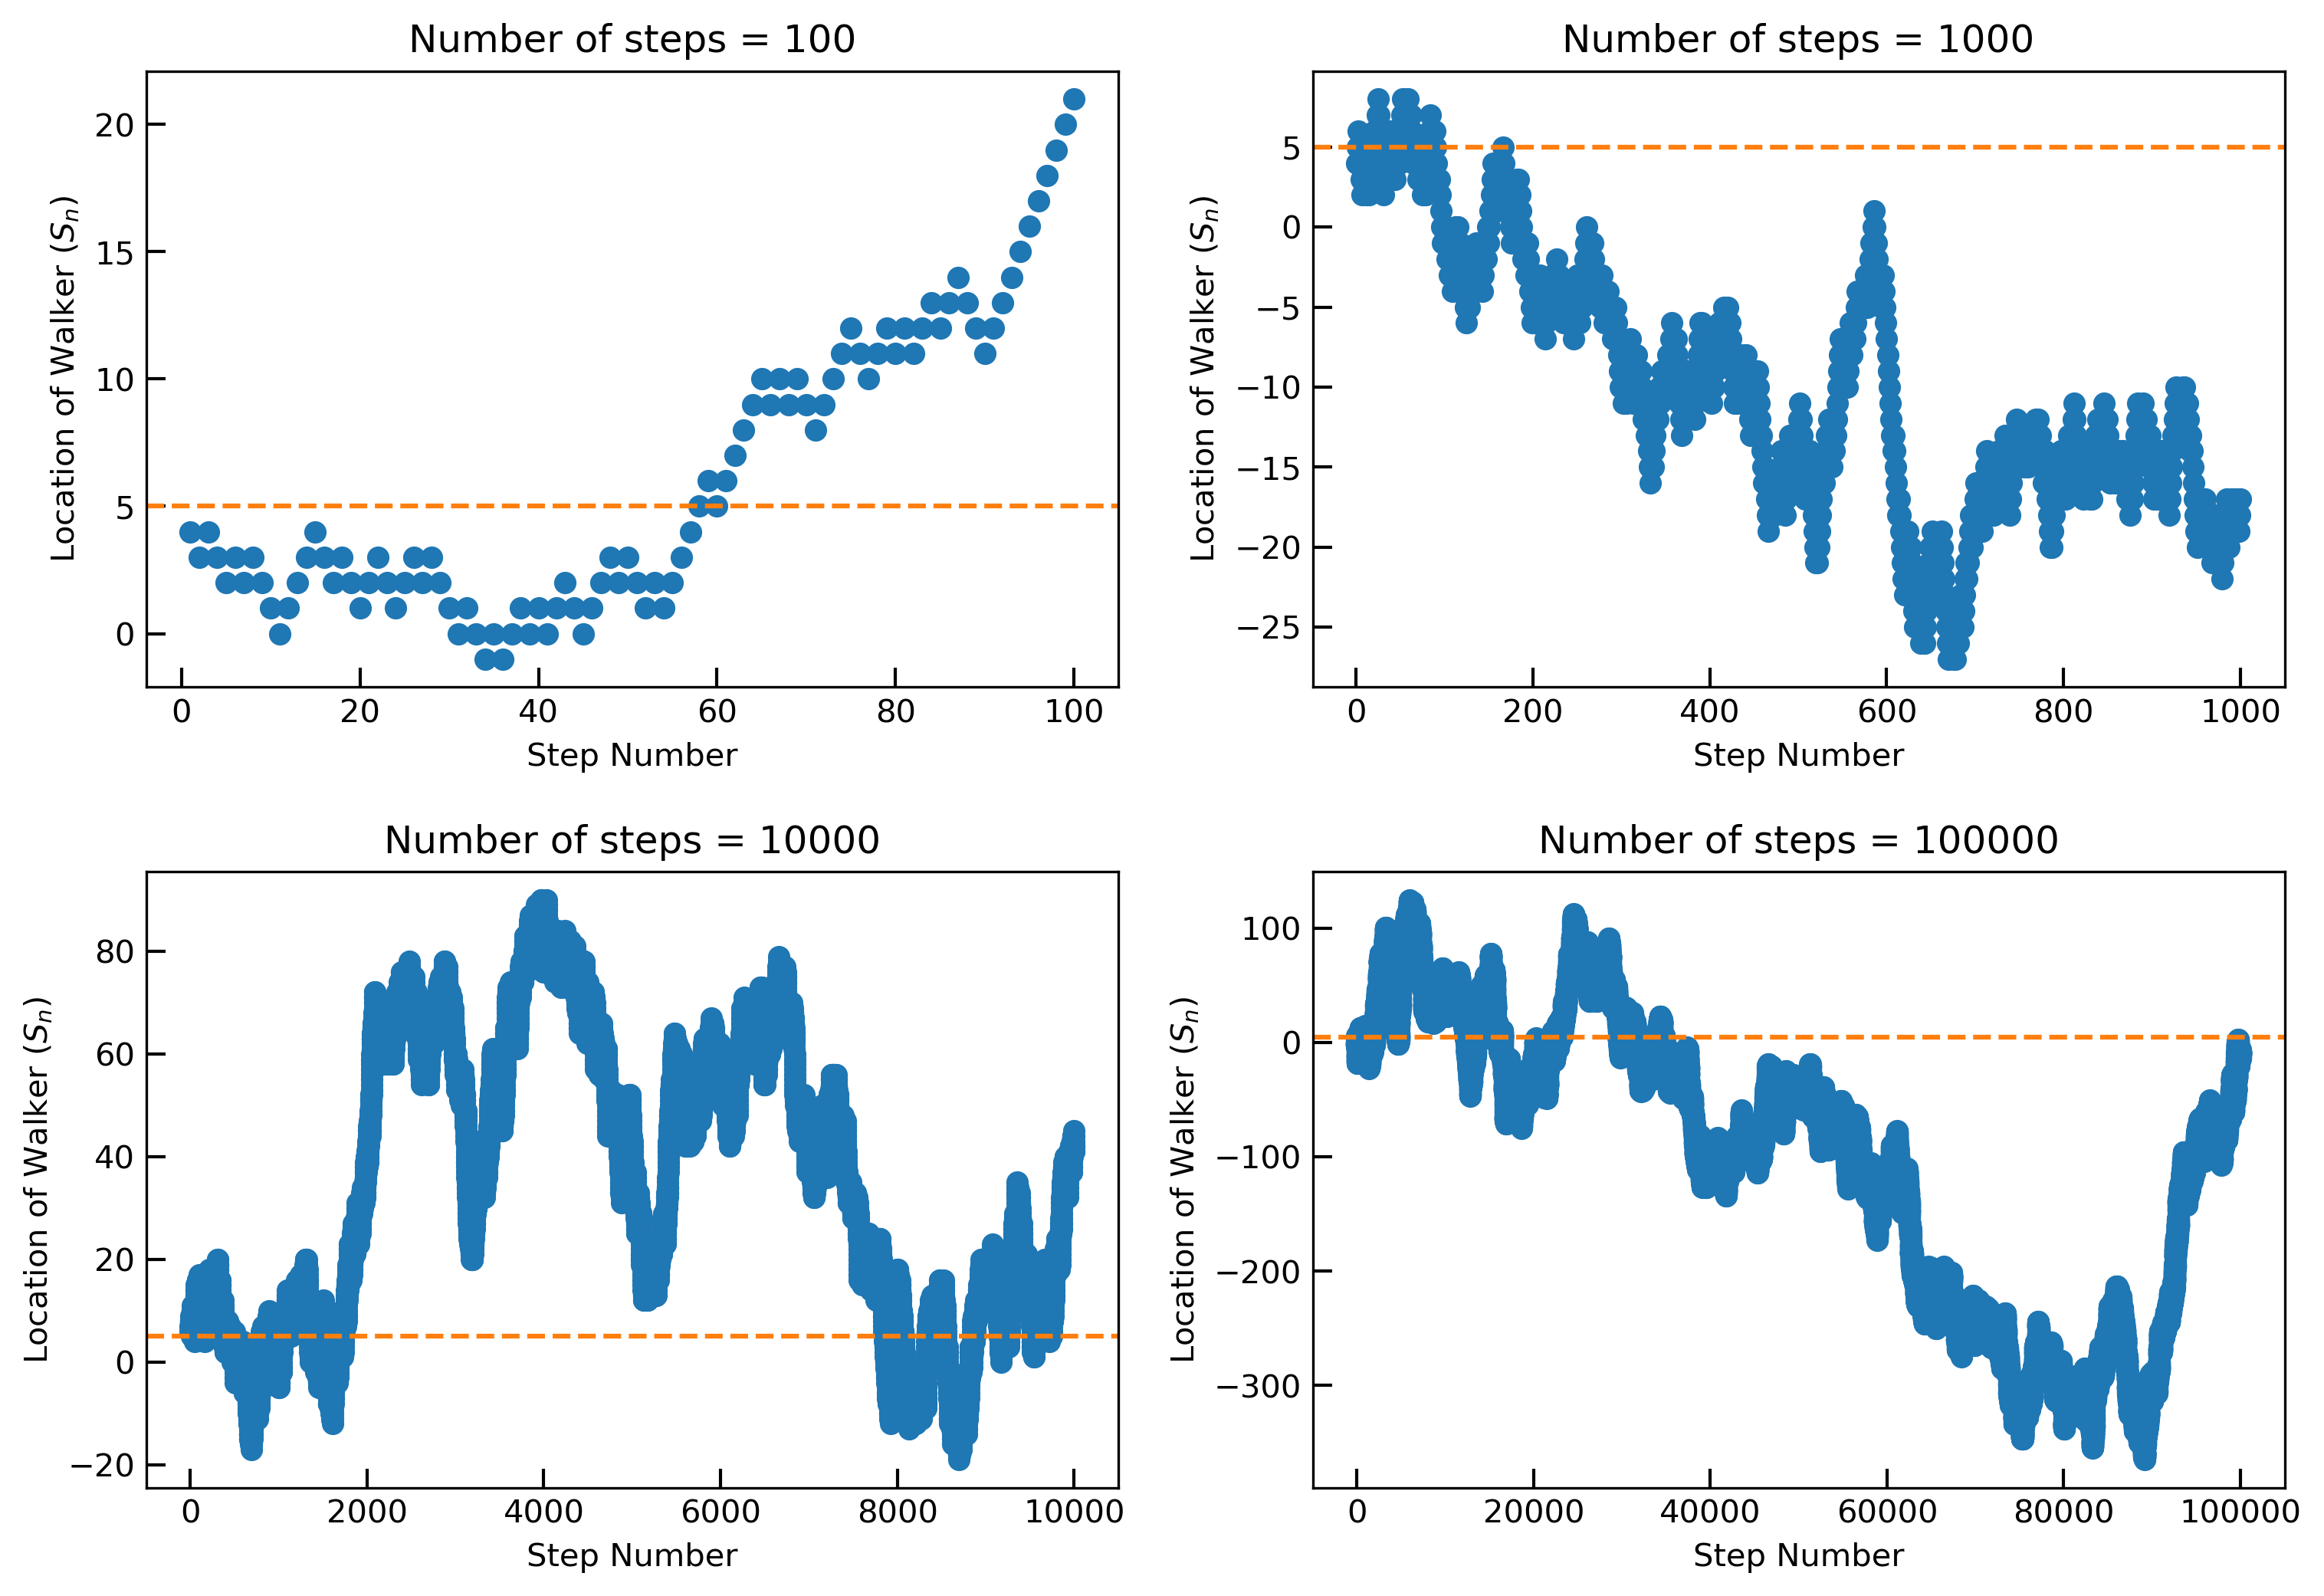

In [41]:
#plot the trajectories for each # of steps 

row_num, col_num=2,2
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)

axs=ax.ravel()

for i, n_step in enumerate(n_steps):
    #define the x_array for each # of steps
    x_array=np.arange(1,n_step+1)
    S_n=S_ns[n_step]
    axs[i].scatter(x_array,S_n)
    axs[i].tick_params(axis='both', which='major', direction='in', length=6, width=1)
    axs[i].set_xlabel('Step Number')
    axs[i].set_ylabel(r'Location of Walker ($S_n$)')
    axs[i].set_title('Number of steps = %d'%n_step)
    #add a horizontal line at y=S_0 to illustrate the return of the walker back to the origin 
    axs[i].axhline(y=S_0, linestyle='dashed', color='tab:orange')

fig.subplots_adjust(hspace=0.3)

## Simulation of 1 million simple random walkers in 1D

In [64]:
#define the parameters of the problem
n_steps=100 #number of steps 
n_walkers=1000000 #number of walkers
S_0=5

In [65]:
#Step 1: generate random integers 1 or 2
simu= rng.integers(1,3, (n_walkers,n_steps)) 

#Step 2: convert the generated numbers of 1 and 2 to -1 and +1 
steps = (simu==1)*-1+(simu>1)*1 #converts 1 and 2 to -1 (step to the left) and 1 (step to the right)

#Step 3: find S_n
S_n = S_0+np.cumsum(steps,1) 

## Find the mean

In [95]:
mean_Sn=np.mean(S_n[:, -1])
display(Latex('The expected value of $S_{n}$ is %f'%mean_Sn)) #formatting printing (took from https://stackoverflow.com/questions/4028267/how-to-render-latex-markup-using-python)

<IPython.core.display.Latex object>

### The analytical expected value is S_0, which in our case is 5, and so the numerical evaluation (5.004928) matches our analytical value

## Find the mean square displacement

In [97]:
msd = np.mean((S_n[:, -1]-S_0)**2)
display(Latex('The mean square displacement of $S_{n}$ is %f'%msd))

<IPython.core.display.Latex object>

### The analytical msd is n, which in our case is 100, and so the numerical evaluation (100.272512) matches our analytical value